[View in Colaboratory](https://colab.research.google.com/github/sabumjung/DL-with-TensorFlow/blob/DL-with-TensorFlow/5%EC%9E%A5_2.ipynb)

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
#Plot 함수
def plotresult(org_vec,noisy_vec,out_vec):
    plt.matshow(np.reshape(org_vec, (28, 28)),\
                cmap=plt.get_cmap('gray'))
    plt.title("Original Image")
    plt.colorbar()

    plt.matshow(np.reshape(noisy_vec, (28, 28)),\
                cmap=plt.get_cmap('gray'))
    plt.title("Input Image")
    plt.colorbar()
    
    outimg   = np.reshape(out_vec, (28, 28))
    plt.matshow(outimg, cmap=plt.get_cmap('gray'))
    plt.title("Reconstructed Image")
    plt.colorbar()
    plt.show()

In [3]:
# 신경망 파라미터
n_input    = 784 
n_hidden_1 = 256 
n_hidden_2 = 256 
n_output   = 784

epochs     = 100
batch_size = 100
disp_step  = 10

print ("PACKAGES LOADED")


PACKAGES LOADED


In [5]:
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("MNIST LOADED")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
MNIST LOADED


In [0]:
# 플레이스홀더()PLACEHOLDERS)
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")

In [0]:
# 가중치와 바이어스(WEIGHTS, biases)
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}


In [0]:
# 인코더와 디코더 설정
encode_in = tf.nn.sigmoid\
          (tf.add(tf.matmul\
                  (x, weights['h1']),\
                  biases['b1'])) 

encode_out = tf.nn.dropout\
             (encode_in, dropout_keep_prob) 

decode_in = tf.nn.sigmoid\
          (tf.add(tf.matmul\
                  (encode_out, weights['h2']),\
                  biases['b2'])) 

decode_out = tf.nn.dropout(decode_in,\
                           dropout_keep_prob)

# 출력값 설정
y_pred = tf.nn.sigmoid\
         (tf.matmul(decode_out,\
                    weights['out']) +\
          biases['out'])

In [0]:
# 손실함수(COST)으로 ()예측값-목표값)^2 설정
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))

# 최적화 방법(OPTIMIZER)으로 RMSProp 설정
optmizer = tf.train.RMSPropOptimizer(0.01).minimize(cost)

# 변수초기화(INITIALIZER)
init = tf.global_variables_initializer()

Start Training
Epoch 00/100 average cost: 0.206108
Start Test
Test label is 8


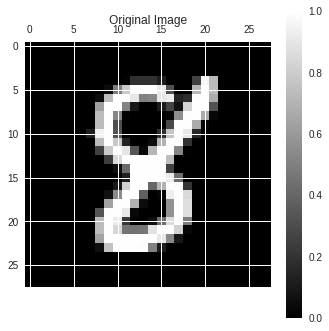

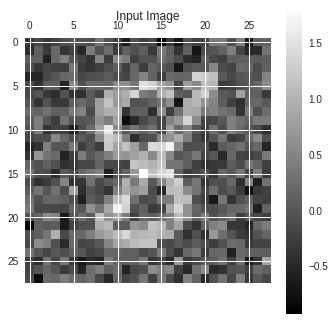

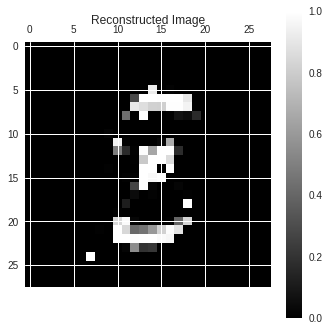

restart Training
Epoch 10/100 average cost: 0.033269
Start Test
Test label is 3


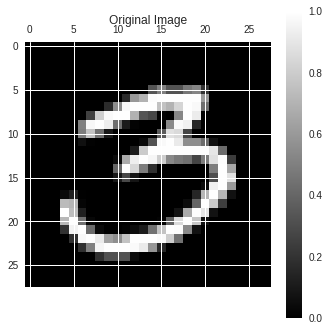

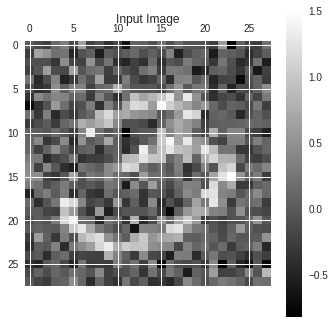

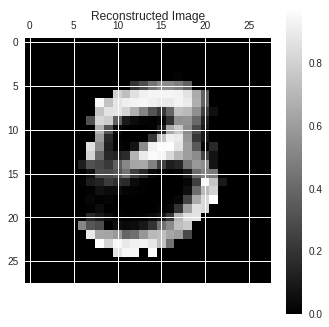

restart Training
Epoch 20/100 average cost: 0.026762
Start Test
Test label is 8


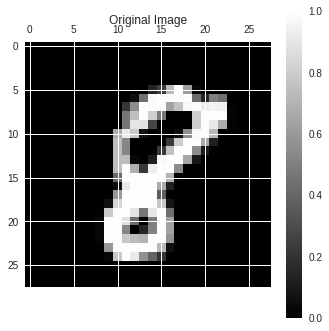

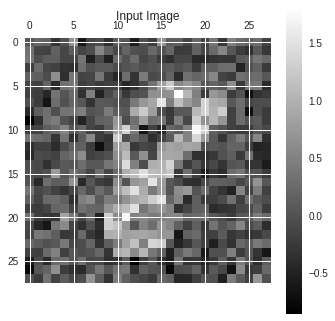

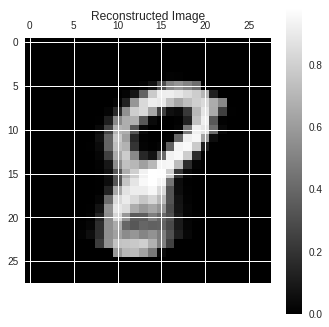

restart Training
Epoch 30/100 average cost: 0.023991
Start Test
Test label is 2


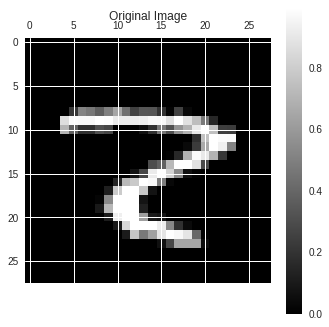

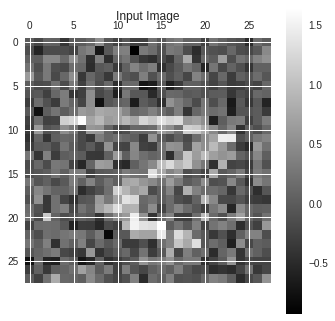

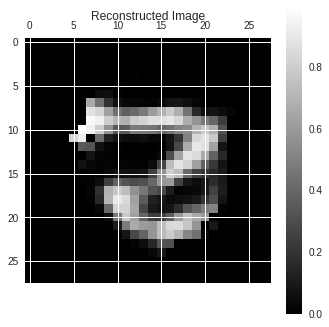

restart Training
Epoch 40/100 average cost: 0.021777
Start Test
Test label is 9


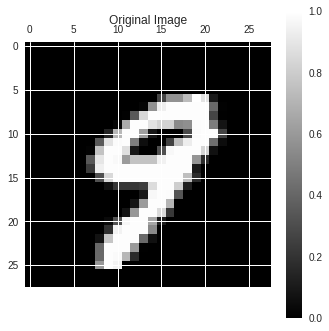

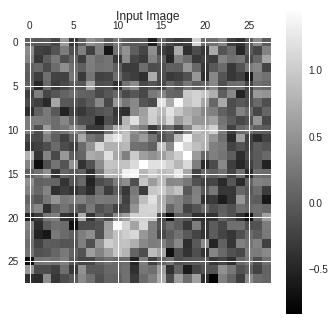

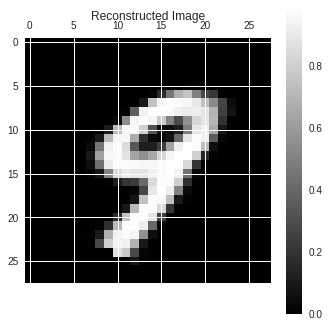

restart Training
Epoch 50/100 average cost: 0.020566
Start Test
Test label is 7


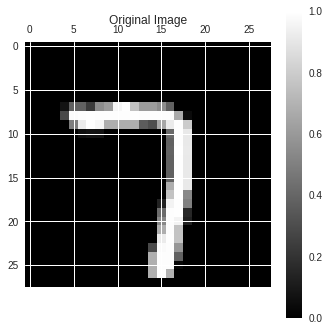

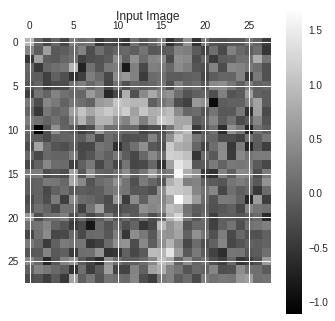

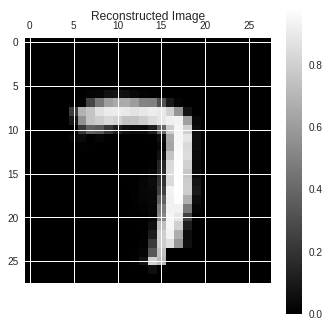

restart Training
Epoch 60/100 average cost: 0.019557
Start Test
Test label is 3


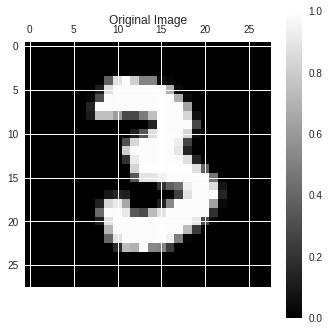

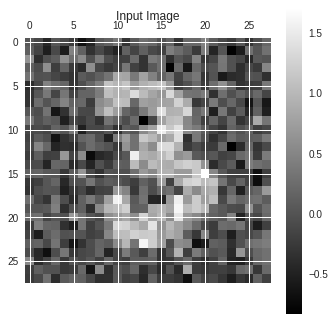

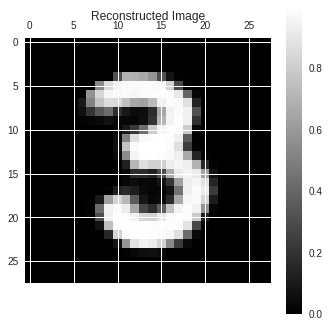

restart Training
Epoch 70/100 average cost: 0.018743
Start Test
Test label is 7


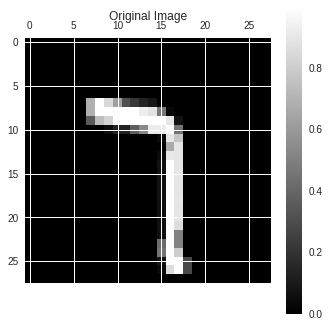

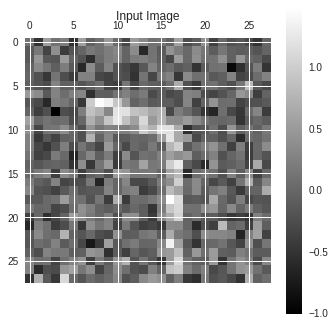

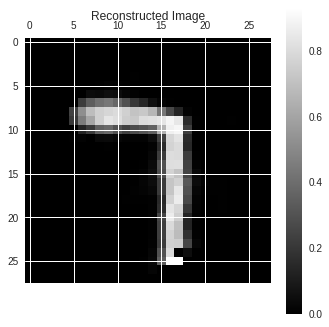

restart Training
Epoch 80/100 average cost: 0.018190
Start Test
Test label is 6


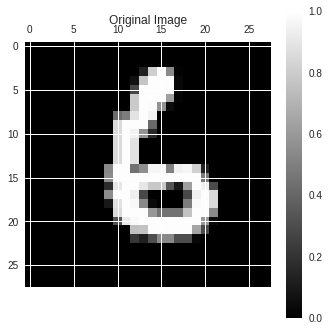

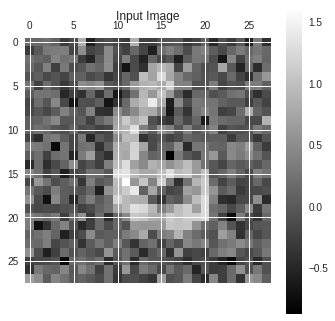

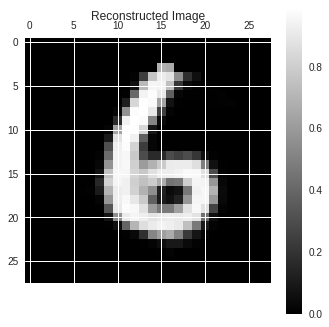

restart Training
Epoch 90/100 average cost: 0.017787
Start Test
Test label is 2


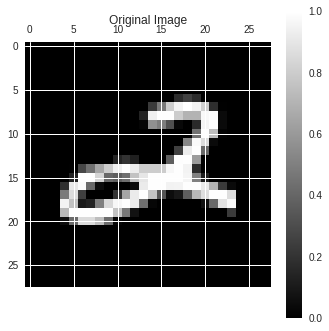

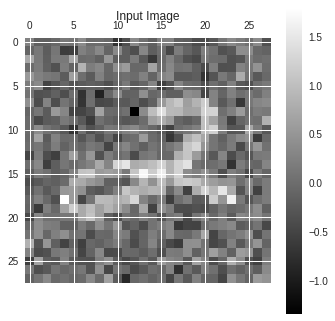

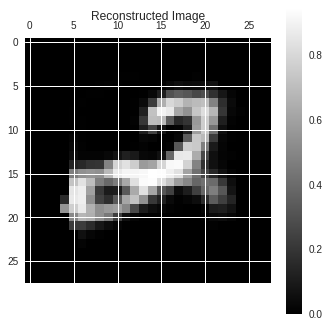

restart Training
Epoch 100/100 average cost: 0.017349
Start Test
Test label is 9


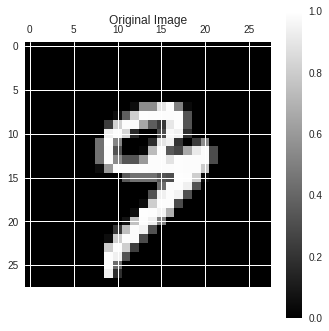

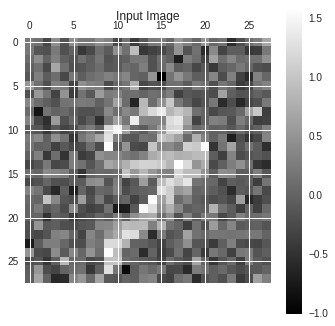

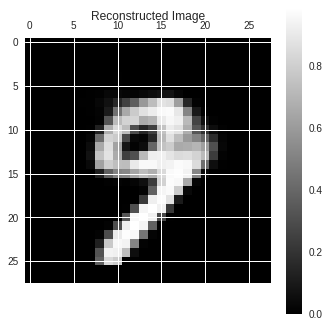

restart Training


In [14]:
# 그래프실행(Launch the graph)
with tf.Session() as sess:
    sess.run(init)
    print ("Start Training")
    for epoch in range(epochs+1):
        num_batch  = int(mnist.train.num_examples/batch_size)
        total_cost = 0.
        for i in range(num_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_size, 784)
            feeds = {x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.8}
            sess.run(optmizer, feed_dict=feeds)
            total_cost += sess.run(cost, feed_dict=feeds)

        # 결과 표시
        if epoch % disp_step == 0:
            print ("Epoch %02d/%02d average cost: %.6f" 
                   % (epoch, epochs, total_cost/num_batch))

            # 테스트
            print ("Start Test")
            randidx   = np.random.randint\
                        (testimg.shape[0], size=1)
            orgvec    = testimg[randidx, :]
            testvec   = testimg[randidx, :]
            label     = np.argmax(testlabel[randidx, :], 1)

            print ("Test label is %d" % (label)) 
            noisyvec = testvec + 0.3*np.random.randn(1, 784)
            outvec   = sess.run(y_pred,\
                                feed_dict={x: noisyvec,\
                                           dropout_keep_prob: 1})

            plotresult(orgvec,noisyvec,outvec)
            print ("restart Training")